In [4]:
import requests
res = requests.get('https://www.coingecko.com/zh-tw/%E5%8C%AF%E7%8E%87%E8%B5%B0%E5%8B%A2%E5%9C%96/%E6%AF%94%E7%89%B9%E5%B9%A3/twd')
#res.text

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
price = soup.select('#coin_maxd_historical_price_chart')[0].prettify('utf-8').decode('utf-8')
price

'<div data-prices="[[1367107200000.0,null],[1367193600000.0,4262.3287],[1367280000000.0,4104.9241],[1367366400000.0,3433.0342],[1367452800000.0,3136.7031],[1367539200000.0,2902.5621],[1367625600000.0,3336.1747],[1367712000000.0,3426.0044],[1367798400000.0,3322.6621],[1367884800000.0,3241.5175],[1367971200000.0,3349.3486],[1368057600000.0,3318.5059],[1368144000000.0,3476.9778],[1368230400000.0,3428.6893],[1368316800000.0,3411.5055],[1368403200000.0,3506.6719],[1368489600000.0,3325.7787],[1368576000000.0,3415.4183],[1368662400000.0,3536.0272],[1368748800000.0,3705.8709],[1368835200000.0,3698.5109],[1368921600000.0,3677.6515],[1369008000000.0,3662.0697],[1369094400000.0,3679.7111],[1369180800000.0,3698.8376],[1369267200000.0,3775.2618],[1369353600000.0,3980.2337],[1369440000000.0,3958.3399],[1369526400000.0,4001.0041],[1369612800000.0,3889.2573],[1369699200000.0,3858.8946],[1369785600000.0,3970.9954],[1369872000000.0,3862.2403],[1369958400000.0,3865.7404],[1370044800000.0,3876.5232],[1370

In [8]:
import re
m = re.search('(\[\[.*?\]\])', price)
m
price_str = eval(m.group(1).replace('null', 'None'))
price_str

[[1367107200000.0, None],
 [1367193600000.0, 4262.3287],
 [1367280000000.0, 4104.9241],
 [1367366400000.0, 3433.0342],
 [1367452800000.0, 3136.7031],
 [1367539200000.0, 2902.5621],
 [1367625600000.0, 3336.1747],
 [1367712000000.0, 3426.0044],
 [1367798400000.0, 3322.6621],
 [1367884800000.0, 3241.5175],
 [1367971200000.0, 3349.3486],
 [1368057600000.0, 3318.5059],
 [1368144000000.0, 3476.9778],
 [1368230400000.0, 3428.6893],
 [1368316800000.0, 3411.5055],
 [1368403200000.0, 3506.6719],
 [1368489600000.0, 3325.7787],
 [1368576000000.0, 3415.4183],
 [1368662400000.0, 3536.0272],
 [1368748800000.0, 3705.8709],
 [1368835200000.0, 3698.5109],
 [1368921600000.0, 3677.6515],
 [1369008000000.0, 3662.0697],
 [1369094400000.0, 3679.7111],
 [1369180800000.0, 3698.8376],
 [1369267200000.0, 3775.2618],
 [1369353600000.0, 3980.2337],
 [1369440000000.0, 3958.3399],
 [1369526400000.0, 4001.0041],
 [1369612800000.0, 3889.2573],
 [1369699200000.0, 3858.8946],
 [1369785600000.0, 3970.9954],
 [13698720000

In [10]:
import pandas
df = pandas.DataFrame(price_str)
df.head()

,0,1
0,1.367107e+12,NaN
1,1.367194e+12,4262.3287
2,1.367280e+12,4104.9241
3,1.367366e+12,3433.0342
4,1.367453e+12,3136.7031


In [11]:
df.columns = ['time','price']
df.head()

,time,price
0,1.367107e+12,NaN
1,1.367194e+12,4262.3287
2,1.367280e+12,4104.9241
3,1.367366e+12,3433.0342
4,1.367453e+12,3136.7031


In [12]:
df.index= df['time']

In [13]:
df['price'].describe()

count      1590.000000
mean      20584.929973
std       22450.691765
min        1998.655400
25%        8185.442350
50%       14248.978400
75%       21609.613675
max      146474.511433
Name: price, dtype: float64

Populating the interactive namespace from numpy and matplotlib


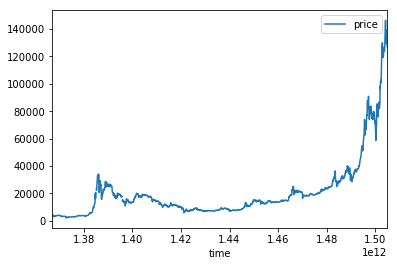

In [14]:
%pylab inline
df[['price']].plot(kind = 'line')

In [15]:
df['mvg'] =  df['price'].rolling(window = 30).mean()

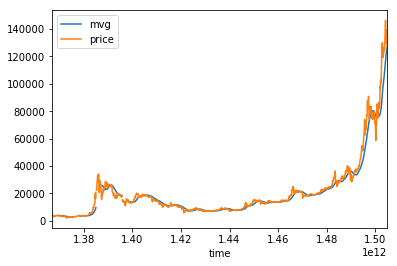

In [16]:
df[['mvg', 'price']].plot(kind = 'line')